# Лекция №5

## Особые точки

Настало время перейти к более продвинутым методам сравнения изображений. На прошлых занятих мы рассматривали методы, которые базировались больше на глобальных признаках изображения. Однако, для того, чтобы исследовать схожесть неких изображений, недостаточно иметь представление только глобальных признаков. В качестве шага в определение локальных признаков мы рассматривали метод "плавающего окна". 

Итак, введем предположение, что на изображении можно найти локальные признаки в некой окрестности __ключевой точки__. Вопрос: что брать за ключевую точку и какую окрестность?

Для начала разберемся почему глобальные признаки иногда работают плохо на примере следующих изображений.

<img src="https://i.ibb.co/6FFHWd5/image--000.jpg" alt="Drawing" style="width: 600px;"/> 

Из всего этого вытекает идея - хочется как-то выделить точки их окрестности, к которым можно привязаться для сравнения. 

### Свойства особых точек
1. Их должно быть немного
    
    • существенно меньше, чем пикселей на изображении
    
    
2. Информативные, репрезентативные, уникальные (distinctive)
   
   • Если окрестности двух точек не отличимы, будет сложно понять, какую из них сопоставить искомому фрагменту
   

3. Повторяемые (repeatable)
    
    • Одна и та же точка должна находиться на изображении вне зависимости от геометрических и фотометрических изменений объекта съемки
    

4. Локальные (local)
   
   • Небольшого размера, устойчивы к частичному перекрытию другим объектом
   
### Повторяемость особых точек
    ● Необходимо, чтобы хотя бы часть особых точек первого изображения была обнаружена на втором

    ● При этом обнаружение особых точек должно происходить независимо для каждого изображения

### Информативность, репрезентативность
    ● Желательна однозначность в сопоставлении фрагментов
    
    ● Желательна инвариантность к геометрическим и фотометрическим трансформациям объекта на разных изображениях

### Геометрические и фотометрические трансформации изображения.

● Геометрические:

    ○ Поворот
    
    ○ Поворот + изменение масштаба
    
    ○ Афинные преобразования
    
● Фотометрические

    ○ Афинные преобразования интенстивности (I → a I + b)

### Сравнение изображений при помощи локальных признаков: основные шаги

1. Локализация особых точек


2. Выделение особых фрагментов – окрестности ключевых точек, инвариантные к различного рода преобразованиям


3. Построение векторов признаков для найденных фрагментов


4. Сопоставление наборов локальных признаков для двух изображений
    
<img src="https://i.ibb.co/fD6fRDJ/image--007.jpg" alt="Drawing" style="width: 400px;"/> 

Перейдем к рассмотрению популярных дексрипторов изображений для особых точек. 

## Harris Corner Detection

В предыдущей главе мы увидели, что углы - это области изображения с большой разницей в интенсивности во всех направлениях. Одна из ранних попыток найти эти углы была сделана Крисом Харрисом и Майком Стивенсом в их статье «Комбинированный детектор углов и краев» в 1988 году, так что теперь она называется «Детектор углов Харриса». Он перенес эту простую идею в математическую форму. Это в основном находит разницу в интенсивности для смещения (u, v) во всех направлениях. Это выражается как ниже:

$$E(u,v) = \sum_{x,y} \underbrace{w(x,y)}_\text{window function} \, [\underbrace{I(x+u,y+v)}_\text{shifted intensity}-\underbrace{I(x,y)}_\text{intensity}]^2$$

Оконная функция - это либо прямоугольное окно, либо гауссово окно, которое дает вес пикселям внизу.

Мы должны максимизировать эту функцию E (u, v) для обнаружения угла. Это означает, что мы должны максимизировать второй срок. Применяя расширение Тейлора к вышеприведенному уравнению и используя некоторые математические шаги (пожалуйста, обратитесь к любым стандартным учебникам, которые вам нравятся для полного вывода), мы получаем окончательное уравнение как:

$$E(u,v) \approx \begin{bmatrix} u & v \end{bmatrix} M \begin{bmatrix} u \\ v \end{bmatrix}$$

где

$$M = \sum_{x,y} w(x,y) \begin{bmatrix}I_x I_x & I_x I_y \\
                                     I_x I_y & I_y I_y \end{bmatrix}$$

Здесь $I_x$ и $I_y$ являются производными изображения в направлениях $x$ и $y$ соответственно. (Может быть легко обнаружен с помощью cv2.Sobel()).

Затем идет основная часть. После этого они создали счет, в основном уравнение, которое определит, может ли окно содержать угол или нет.

$$R = det(M) - k(trace(M))^2$$

где

1. $det (M) = \lambda_1 \lambda_2$

2. $trace (M) = \lambda_1 + \lambda_2$

3. $\lambda_1$ и $\lambda_2$ - собственные значения $M$

Таким образом, значения этих собственных значений определяют, является ли область угловой, кромочной или плоской.

1. Когда $|R|$ маленький, что случается, когда $\lambda_1$ и $\lambda_2$ маленькие, область плоская.

2. Когда $R<0$, что происходит, когда $\lambda_1 >> \lambda_2$ или наоборот, область является ребром.

3. Когда $R$ большое, что происходит, когда $\lambda_1$ и $\lambda_2$ большие и $\lambda_1 \sim \lambda_2$, регион является углом.

На картинке это можно представить следующим образом:
<img src="https://i.ibb.co/3CvVLTP/image--017.jpg" alt="Drawing" style="width: 600px;"/> 

### Harris Corner Detector in OpenCV
Для этой цели в OpenCV есть функция cv2.cornerHarris(). Его аргументы:

1. img - входное изображение, оно должно быть в градациях серого и иметь тип float32.
2. blockSize - это размер окрестности, рассматриваемый для обнаружения угла
3. ksize - параметр апертуры используемого производного Собеля.
4. k - свободный параметр детектора Харриса в уравнении.

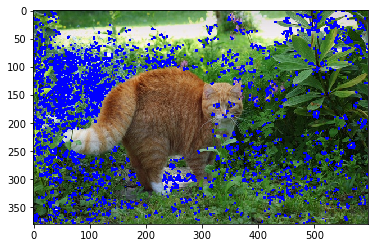

In [8]:
from __future__ import print_function
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = 'img/cat.jpg'
img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(img)
plt.show()

In [9]:
cv2.__version__

'4.1.0'

In [10]:
source_window = 'Source image'
corners_window = 'Corners detected'
max_thresh = 255
def cornerHarris_demo(val):
    thresh = val
    # Detector parameters
    blockSize = 2
    apertureSize = 3
    k = 0.04
    # Detecting corners
    dst = cv2.cornerHarris(src_gray, blockSize, apertureSize, k)
    # Normalizing
    dst_norm = np.empty(dst.shape, dtype=np.float32)
    cv2.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    dst_norm_scaled = cv2.convertScaleAbs(dst_norm)
    # Drawing a circle around corners
    for i in range(dst_norm.shape[0]):
        for j in range(dst_norm.shape[1]):
            if int(dst_norm[i,j]) > thresh:
                cv2.circle(dst_norm_scaled, (j,i), 5, (0), 2)
    # Showing the result
    cv2.namedWindow(corners_window)
    cv2.imshow(corners_window, dst_norm_scaled)

filename = 'img/cat.jpg'
src = cv2.imread(filename)
if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
# Create a window and a trackbar
cv2.namedWindow(source_window)
thresh = 200 # initial threshold
cv2.createTrackbar('Threshold: ', source_window, thresh, max_thresh, cornerHarris_demo)
cv2.imshow(source_window, src)
cornerHarris_demo(thresh)
if cv2.waitKey() == ord('q'):
    pass
cv2.destroyAllWindows()

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:610: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


## Shi-Tomasi Corner Detector & Good Features to Track
В прошлой главе мы увидели детектор углов Харриса. Позже в 1994 году Дж. Ши и К. Томази внесли небольшую модификацию в свою статью Good Features to Track, которая показывает лучшие результаты по сравнению с детектором Harris Corner Detector. Оценочную функцию в Harris Corner Detector предоставили:

$$R = \lambda_1 \lambda_2 - k(\lambda_1+\lambda_2)^2$$

Вместо этого Ши-Томаси предложил:

$$R = min(\lambda_1, \lambda_2)$$

Если оно больше порогового значения, оно рассматривается как угол. Если мы построим его в пространстве $\lambda_1 - \lambda_2$, как мы это делали в Harris Corner Detector, мы получим изображение, как показано ниже:

<img src="https://i.ibb.co/sCBQZVp/shitomasi_space.png" alt="Drawing" style="width: 400px;"/> 


Из рисунка видно, что только когда $\lambda_1$ и $\lambda_2$ превышают минимальное значение $\lambda_ {min}$, оно считается углом (зеленая область).

### Shi-Tomasi Corner Detector in OpenCV

OpenCV имеет функцию cv2.goodFeaturesToTrack (). Он находит N самых сильных углов на изображении методом Ши-Томази (или Обнаружение углов Харриса, если вы его укажете). Как обычно, изображение должно быть изображением в градациях серого. Затем вы указываете количество углов, которые вы хотите найти. Затем вы указываете уровень качества, который является значением в диапазоне 0-1, что обозначает минимальное качество угла, ниже которого все отклоняются. Затем мы предоставляем минимальное евклидово расстояние между обнаруженными углами.

Со всей этой информацией функция находит углы на изображении. Все углы ниже уровня качества отклоняются. Затем сортирует оставшиеся углы по качеству в порядке убывания. Затем функция занимает первый самый сильный угол, отбрасывает все близлежащие углы в диапазоне минимального расстояния и возвращает N самых сильных углов.

В приведенном ниже примере мы попытаемся найти 25 лучших углов:

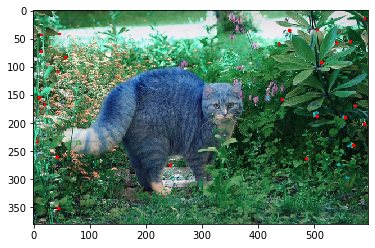

In [5]:
img = cv2.imread('img/cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img)
plt.show();

In [6]:
import random as rng

source_window = 'Image'
maxTrackbar = 100
rng.seed(12345)
def goodFeaturesToTrack_Demo(val):
    maxCorners = max(val, 1)
    # Parameters for Shi-Tomasi algorithm
    qualityLevel = 0.01
    minDistance = 10
    blockSize = 3
    gradientSize = 3
    useHarrisDetector = False
    k = 0.04
    # Copy the source image
    copy = np.copy(src)
    # Apply corner detection
    corners = cv2.goodFeaturesToTrack(src_gray, maxCorners, qualityLevel, minDistance, None, \
        blockSize=blockSize, gradientSize=gradientSize, useHarrisDetector=useHarrisDetector, k=k)
    # Draw corners detected
#     print('** Number of corners detected:', corners.shape[0])
    radius = 4
    for i in range(corners.shape[0]):
        cv2.circle(copy, 
                   (corners[i,0,0], corners[i,0,1]), radius, (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256)),
                   cv2.FILLED)
    # Show what you got
    cv2.namedWindow(source_window)
    cv2.imshow(source_window, copy)
    
# Load source image and convert it to gray

filename = 'img/cat.jpg'
src = cv2.imread(filename)
if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
# Create a window and a trackbar
cv2.namedWindow(source_window)
maxCorners = 23 # initial threshold
cv2.createTrackbar('Threshold: ', source_window, maxCorners, maxTrackbar, goodFeaturesToTrack_Demo)
cv2.imshow(source_window, src)
goodFeaturesToTrack_Demo(maxCorners)
if cv2.waitKey() == ord('q'):
    pass
cv2.destroyAllWindows()

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:610: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


## Introduction to SIFT (Scale-Invariant Feature Transform)

В последних двух главах мы видели некоторые детекторы углов, такие как Харрис и т. Д. Они не зависят от вращения, что означает, что даже если изображение поворачивается, мы можем найти те же углы. Это очевидно, потому что углы остаются и в повернутом изображении. Но как насчет масштабирования? Угол может не быть углом, если изображение масштабировано. Например, проверьте простое изображение ниже. Угол на небольшом изображении в небольшом окне является плоским, когда он увеличен в том же окне. Так что угол Харриса не является масштабно-инвариантным.

<img src="https://i.ibb.co/N7kR8Lc/sift_scale_invariant.jpg" alt="Drawing" style="width: 400px;"/> 

Рассмотрим новый алгоритм Scale Invariant Feature Transform (SIFT), который позволяет сохранить инвариантость к масштабированию.

### 1. Обнаружение экстремумов в пространстве

Из рисунка выше видно, что мы не можем использовать одно и то же окно для обнаружения ключевых точек с разным масштабом. Это нормально с небольшим углом. Но чтобы обнаружить большие углы, нам нужны большие окна. Для этого используется масштабная фильтрация. В нем найден лапласиан гауссовский для изображения с различными значениями $\sigma$. LoG действует как детектор капель, который обнаруживает капли разных размеров из-за изменения $\sigma$. Короче говоря, $\sigma$ действует как параметр масштабирования. Например, на изображении выше, ядро Гаусса с низким значением $\sigma$ дает высокое значение для небольшого угла, в то время как ядро гауссиана с высоким значением $\sigma$ хорошо подходит для большего угла. Таким образом, мы можем найти локальные максимумы по шкале и пространству, которые дают нам список значений $(x, y, \sigma)$, что означает, что существует потенциальная ключевая точка в точке $(x, y)$ в масштабе $\sigma$.

Но этот LoG немного дорог, поэтому алгоритм SIFT использует разность гауссианов, которая является приближением LoG. Разность по Гауссу получается как разница по размытию по Гауссу изображения с двумя разными $\sigma$, пусть это будут $\sigma$ и $k \sigma$. Этот процесс выполняется для разных октав изображения в гауссовой пирамиде. Это представлено на изображении ниже:

<img src="https://i.ibb.co/WWyXGrD/sift_dog.jpg" alt="Drawing" style="width: 400px;"/>

Как только эта DoG найдена, изображения ищут локальные экстремумы в масштабе и пространстве. Например, один пиксель в изображении сравнивается с его 8 соседями, а также с 9 пикселями в следующем масштабе и 9 пикселями в предыдущих масштабах. Если это локальный экстремум, это потенциальная ключевая точка. Это в основном означает, что ключевой момент лучше всего представлен в этом масштабе. Это показано на рисунке ниже:

<img src="https://i.ibb.co/2YN6FZ6/sift_local_extrema.jpg" alt="Drawing" style="width: 300px;"/>

Что касается различных параметров, в статье приведены некоторые эмпирические данные, которые можно суммировать как: число $octaves = 4$, количество уровней $scale = 5$, начальные $\sigma = 1.6$, $k = \sqrt {2}$ и т. Д. В качестве оптимальных значений.

### 2. Локализация ключевых точек

Как только потенциальные ключевые точки найдены, их необходимо уточнить, чтобы получить более точные результаты. Они использовали расширение масштаба шкалы Тейлора, чтобы получить более точное местоположение экстремумов, и если интенсивность этих экстремумов меньше порогового значения (0,03 согласно статье), оно отклоняется. Этот порог называется контрастным порогом в OpenCV

У DoG более высокий отклик на ребра, поэтому ребра также должны быть удалены. Для этого используется концепция, похожая на угловой детектор Harris. Они использовали матрицу Гессиана 2x2 (H) для вычисления кривизны кривизны. Из углового детектора Харриса мы знаем, что для ребер одно собственное значение больше другого. Так что здесь они использовали простую функцию,

Если это отношение больше порога, называемого edgeThreshold в OpenCV, эта ключевая точка отбрасывается. Это дано как 10 в статье.

Таким образом, он устраняет любые малоконтрастные ключевые точки и граничные ключевые точки, а остающиеся точки - это сильные точки интереса.

### 3. Ориентация значения

Теперь ориентация назначается каждой ключевой точке для достижения неизменности вращения изображения. Вокруг местоположения ключевой точки берется окрестность в зависимости от масштаба, и в этой области вычисляются величина и направление градиента. Создается гистограмма ориентации с 36 ячейками, охватывающими 360 градусов. (Он взвешивается по величине градиента и по гауссовому круглому окну с $\sigma$, равным 1,5-кратному масштабу ключевой точки. Принимается самый высокий пик в гистограмме, и любой пик выше 80% также считается для расчета ориентации. Он создает ключевые точки с одинаковым расположением и масштабом, но разными направлениями, что способствует стабильности сопоставления.

### 4. Дескриптор ключевой точки

Теперь дескриптор ключевой точки создан. Окрестность 16x16 вокруг ключевой точки берется. Он разделен на 16 субблоков размером 4х4. Для каждого субблока создается гистограмма ориентации 8 бинов. Таким образом, доступно 128 значений бина. Он представлен в виде вектора для формирования дескриптора ключевой точки. В дополнение к этому, предприняты некоторые меры для достижения устойчивости к изменениям освещенности, вращению и т. Д.

### 5. Сопоставление ключевых точек 

Ключевые точки между двумя изображениями сопоставляются путем определения ближайших соседей. Но в некоторых случаях второй ближайший матч может быть очень близко к первому. Это может произойти из-за шума или по другим причинам. В этом случае берется отношение ближайшего расстояния ко второму ближайшему расстоянию. Если оно больше 0,8, они отклоняются. Это устраняет около 90% ложных совпадений, в то время как отбрасывает только 5% правильных совпадений, согласно статье.

Так что это краткое изложение алгоритма SIFT. Для получения более подробной информации и понимания, чтение оригинальной статьи настоятельно рекомендуется. Помните одну вещь, этот алгоритм запатентован. Таким образом, этот алгоритм включен в модуль Non-free в OpenCV.


In [ ]:
filename = 'img/cat.jpg'
src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)
#-- Step 1: Detect the keypoints using SURF Detector
minHessian = 600
detector = cv2.xfeatures2d_SURF.create(hessianThreshold=minHessian)
keypoints = detector.detect(src)
#-- Draw keypoints
img_keypoints = np.empty((src.shape[0], src.shape[1], 3), dtype=np.uint8)
cv2.drawKeypoints(src, keypoints, img_keypoints)
#-- Show detected (drawn) keypoints
cv2.imshow('SURF Keypoints', img_keypoints)
if cv2.waitKey() == ord('q'):
    pass
cv2.destroyAllWindows()

## Introduction to SURF (Speeded-Up Robust Features)

В прошлой главе мы увидели SIFT для обнаружения и описания ключевых точек. Но это было сравнительно медленно, и людям нужна была более ускоренная версия. В 2006 году три человека, Бей, Х., Туйтелаарс, Т. и Ван Гул, Л., опубликовали еще одну статью «SURF: Ускоренные надежные функции», в которой был представлен новый алгоритм под названием SURF. Как следует из названия, это ускоренная версия SIFT.

В SIFT Лоу аппроксимировал лапласиан гауссиана с разностью гауссов для нахождения масштаба пространства. SURF идет немного дальше и приближается к LoG с Box Filter. На рисунке ниже показана демонстрация такого приближения. Одним из больших преимуществ этого приближения является то, что свертка с блочным фильтром может быть легко рассчитана с помощью интегральных изображений. И это можно сделать параллельно для разных масштабов. Также SURF полагаются на определитель матрицы Гессена как для масштаба, так и для местоположения.

<img src="https://i.ibb.co/hgJT5rC/surf_boxfilter.jpg" alt="Drawing" style="width: 300px;"/>

Для присвоения ориентации SURF использует вейвлет-отклики в горизонтальном и вертикальном направлении для окрестности. Применяем размытие по гауссу. Затем они наносятся на график, как показано на рисунке ниже. Доминирующая ориентация оценивается путем вычисления суммы всех откликов в скользящем окне ориентации под углом 60 градусов. Интересно то, что вейвлет-отклик можно легко определить с помощью интегральных изображений в любом масштабе. Для многих применений инвариантность вращения не требуется, поэтому нет необходимости находить эту ориентацию, что ускоряет процесс. SURF предоставляет такую функциональность, которая называется Upright-SURF или U-SURF. Это улучшает скорость и работает до $\pm 15^{\circ}$. OpenCV поддерживает оба, в зависимости от флага, в вертикальном положении. Если это 0, ориентация рассчитывается. Если это 1, ориентация не рассчитывается, и это быстрее.

<img src="https://i.ibb.co/ys4gc6q/surf_orientation.jpg" alt="Drawing" style="width: 300px;"/>

Для описания функции SURF использует отклики вейвлета в горизонтальном и вертикальном направлении (опять же, использование встроенных изображений облегчает задачу). Вокруг ключевой точки, где s - размер, берется окрестность размером 20x20. Он разделен на 4x4 субрегиона. Для каждого субрегиона принимаются горизонтальные и вертикальные вейвлет-отклики, и вектор формируется следующим образом: $v = (\sum{d_x}, \sum{d_y}, \sum{| d_x |}, \sum{|d_y|})$ , Это, когда представлено как вектор, дает дескриптор функции SURF с общим количеством 64 измерений. Чем меньше размер, тем выше скорость вычислений и сопоставлений, но обеспечьте лучшую различимость функций.

Для большей самобытности дескриптор функции SURF имеет расширенную версию 128 измерений. Суммы $d_x$ и $|d_x|$ вычисляются отдельно для $d_y < 0$ и $d_y \geq 0$. Аналогично, суммы $d_y$ и $|d_y|$ делятся по знаку $d_x$, удваивая количество признаков. Это не добавляет больших вычислительных сложностей. OpenCV поддерживает оба, устанавливая значение флага, расширенного с 0 и 1 для 64-dim и 128-dim соответственно (по умолчанию 128-dim)

Другим важным улучшением является использование знака Лапласа (следа матрицы Гессе) для основной точки интереса. Это не добавляет затрат на вычисление, поскольку оно уже вычислено во время обнаружения. Знак лапласиана отличает яркие пятна на темном фоне от обратной ситуации. На этапе сопоставления мы сравниваем объекты только в том случае, если они имеют одинаковый тип контраста (как показано на рисунке ниже). Эта минимальная информация обеспечивает более быстрое сопоставление без снижения производительности дескриптора.

<img src="https://i.ibb.co/WzkxPhd/surf_matching.jpg" alt="Drawing" style="width: 300px;"/>

Короче говоря, SURF добавляет множество функций для улучшения скорости на каждом этапе. Анализ показывает, что он в 3 раза быстрее, чем SIFT, а производительность сравнима с SIFT. SURF хорош для обработки изображений с размытостью и поворотом, но не справляется с изменением точек обзора и освещенности.

### SURF in OpenCV

OpenCV обеспечивает функциональность SURF так же, как SIFT. Вы инициируете объект SURF с некоторыми дополнительными условиями, такими как дескрипторы 64/128-dim, вертикальный / нормальный SURF и т. Д. Все детали хорошо объяснены в документах. Затем, как мы это делали в SIFT, мы можем использовать SURF.detect(), SURF.compute() и т. Д. Для поиска ключевых точек и дескрипторов.

Сначала мы увидим простую демонстрацию того, как найти ключевые точки и дескрипторы SURF и нарисовать их. Все примеры показаны в терминале Python, поскольку он такой же, как и в SIFT.

In [ ]:
input1 = 'img/asd.png'
img = cv2.imread(input1, cv2.IMREAD_GRAYSCALE)

minHessian = 1000
detector = cv2.xfeatures2d_SURF.create(hessianThreshold=minHessian)
keypoints = detector.detect(img)

img_keypoints = np.empty((img.shape[0], img.shape[1], 3), dtype=np.uint8)
cv2.drawKeypoints(img, keypoints, img_keypoints)
#-- Show detected (drawn) keypoints
plt.imshow(img_keypoints)
plt.show()

In [ ]:
input1 = 'img/asd.png'
input2 = 'img/fhj.png'
img1 = cv2.imread(input1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(input2, cv2.IMREAD_GRAYSCALE)
if img1 is None or img2 is None:
    print('Could not open or find the images!')
    exit(0)
#-- Step 1: Detect the keypoints using SURF Detector, compute the descriptors
minHessian = 5000
detector = cv2.xfeatures2d_SURF.create(hessianThreshold=minHessian)
keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
#-- Step 2: Matching descriptor vectors with a brute force matcher
# Since SURF is a floating-point descriptor NORM_L2 is used
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE)
matches = matcher.match(descriptors1, descriptors2)
#-- Draw matches
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, img_matches)
#-- Show detected matches
cv2.imshow('Matches', img_matches)
if cv2.waitKey() == ord('q'):
    pass
cv2.destroyAllWindows()